In [ ]:
'''📨 Spam Detector using Machine Learning
Overview: A simple ML pipeline to classify SMS messages as spam or not spam using TF-IDF and Naive Bayes.

---

Pipeline:
1. Import libraries
2. Load & explore dataset
3. Preprocess text
4. Train Naive Bayes model
5. Evaluate performance
6. Save model + vectorizer
7. Try custom messages
'''

'📨 Spam Detector using Machine Learning  \nOverview: A simple ML pipeline to classify SMS messages as spam or not spam using TF-IDF and Naive Bayes.\n\n---\n\nPipeline:\n1. Import libraries  \n2. Load & explore dataset  \n3. Preprocess text  \n4. Train Naive Bayes model  \n5. Evaluate performance  \n6. Save model + vectorizer  \n7. Try custom messages  \n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

import joblib  # For saving model

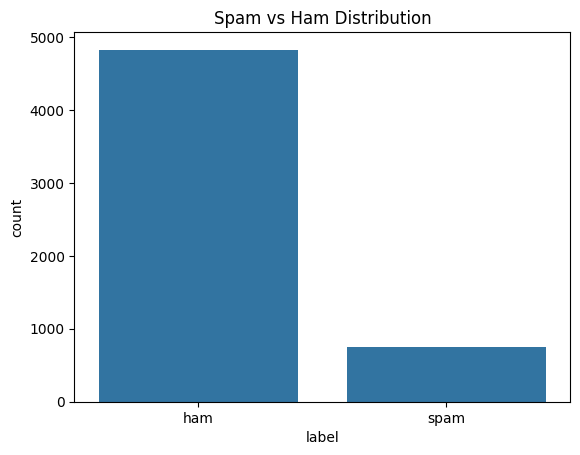

(  label                                            message
 0   ham  Go until jurong point, crazy.. Available only ...
 1   ham                      Ok lar... Joking wif u oni...
 2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
 3   ham  U dun say so early hor... U c already then say...
 4   ham  Nah I don't think he goes to usf, he lives aro...,
 label
 ham     4825
 spam     747
 Name: count, dtype: int64,
 <Axes: title={'center': 'Spam vs Ham Distribution'}, xlabel='label', ylabel='count'>,
 Text(0.5, 1.0, 'Spam vs Ham Distribution'),
 None)

In [ ]:
# Load dataset
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
df = pd.read_table(url, header=None, names=['label', 'message'])

# Display sample and distribution
df.head(), df['label'].value_counts(), sns.countplot(x='label', data=df), plt.title("Spam vs Ham Distribution"), plt.show()

In [ ]:
df['label_num'] = df.label.map({'ham': 0, 'spam': 1})
X = df['message']
y = df['label_num']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

Accuracy: 0.9668161434977578

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.75      0.86       149

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



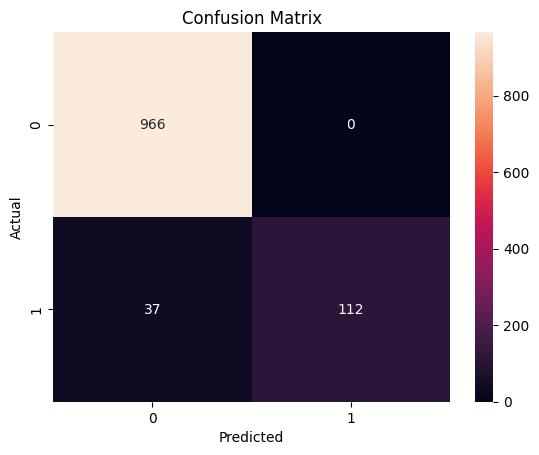

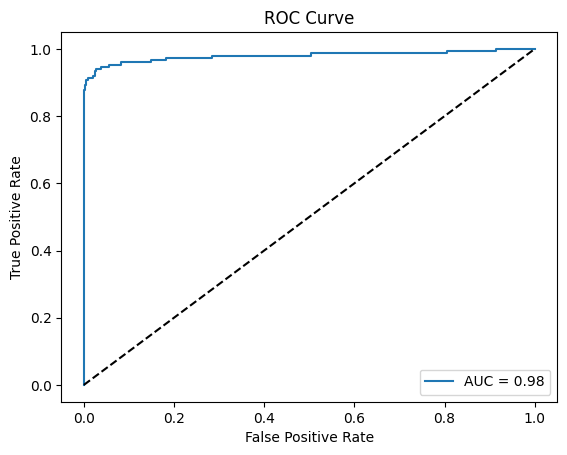

In [ ]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
joblib.dump(model, 'spam_detector_model.pkl')
joblib.dump(vectorizer, 'vectorizer.pkl')
print("Saved model and vectorizer to disk.")

Saved model and vectorizer to disk.


In [ ]:
def predict_spam(msg):
    msg_vec = vectorizer.transform([msg])
    pred = model.predict(msg_vec)[0]
    return "Spam" if pred == 1 else "Not Spam"

# Test example
print(predict_spam("Win a cash prize now! Click to claim."))

Spam


In [ ]:
''' ✅ Conclusion
This Spam Detector pipeline includes:
- Data exploration with visualization
- Text vectorization using TF‑IDF
- Naive Bayes classification
- Performance metrics & ROC analysis
- Model persistence for later use
- Future work: using deep learning (RNN, Transformers), expanding dataset, integrating into a web app.'''

' ✅ Conclusion  \nThis Spam Detector pipeline includes:\n- Data exploration with visualization  \n- Text vectorization using TF‑IDF  \n- Naive Bayes classification  \n- Performance metrics & ROC analysis  \n- Model persistence for later use  \n- Future work: using deep learning (RNN, Transformers), expanding dataset, integrating into a web app.'

**“This project demonstrates a basic ML pipeline for classifying spam messages. Future work can include deep learning approaches like RNNs or using datasets in other languages.”**